## Beer Mug Project

Well.....this has been a learning curve for sure. Ultimately the challenge becomes how to define the 3 dimensional set of points that can be plotted as a surface using the tools of ```pyplot``` from ```matplotlib```. The standard method to do this involves using the ```meshgrid``` tool to facilitate the generation of those points. The second post below from stackoverflow was very helpful. I am going to save this notebook as is and start a fresh one that is more specific to the concerns of the beer mug project. I am definitely **NOT** confident that I have the best method here but I sort of understand this one so I'm going to have to work with this. Look at the BeerMug notebook for further discussion.

Bruce 2/24/20

### Dependencies

The usual...

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


### A nice example from Stackoverflow

[open cyliinder](https://stackoverflow.com/questions/26989131/add-cylinder-to-plot)

What makes this nice is the clarity of the second and third responses. I'm intrigued that the highest voted solution still seems opaque to me while I can parse out the other solutions much more easily. It feels like I should be able to modify this model to rotate a given profile around the z axis. We'll see. 

[how meshgrid works](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)




### Define the function that creates the data



In [2]:
def data_for_cylinder_along_z(poly_coef,max_radius,zmin,zmax, nsteps):
    z = np.linspace(zmin, zmax, nsteps)
    radius = np.full_like(z,4.)
    theta = np.linspace(0, 2*np.pi, nsteps)
    
    for i in range (0, nsteps):
        radius[i] = max_radius*(poly_coef[0]+poly_coef[1]*z[i] + poly_coef[2]*z[i]**2 + poly_coef[3]*z[i]**3)
    
    
    theta_grid, z_grid = np.meshgrid(theta, z)
    for j in range (0,nsteps):
        x_grid = radius[j]*np.cos(theta_grid)
        y_grid = radius[j]*np.sin(theta_grid)
    
#    x_grid = max_radius*np.cos(theta_grid)
#    y_grid = max_radius*np.sin(theta_grid)
    return x_grid,y_grid,z_grid,z,theta,radius


### Sorting out what is happening...

Now I have access to the various parts of the surface generation so I can sort out what it is doing.... off to work!

In [3]:
coefficients = [1.,20.,0.,0.]

Xc,Yc,Zc,zz,th,rad = data_for_cylinder_along_z(coefficients,2.,0.05,0.3,5)
Xc

array([[ 1.40000000e+01,  8.57252759e-16, -1.40000000e+01,
        -2.57175828e-15,  1.40000000e+01],
       [ 1.40000000e+01,  8.57252759e-16, -1.40000000e+01,
        -2.57175828e-15,  1.40000000e+01],
       [ 1.40000000e+01,  8.57252759e-16, -1.40000000e+01,
        -2.57175828e-15,  1.40000000e+01],
       [ 1.40000000e+01,  8.57252759e-16, -1.40000000e+01,
        -2.57175828e-15,  1.40000000e+01],
       [ 1.40000000e+01,  8.57252759e-16, -1.40000000e+01,
        -2.57175828e-15,  1.40000000e+01]])

### Plot the figure

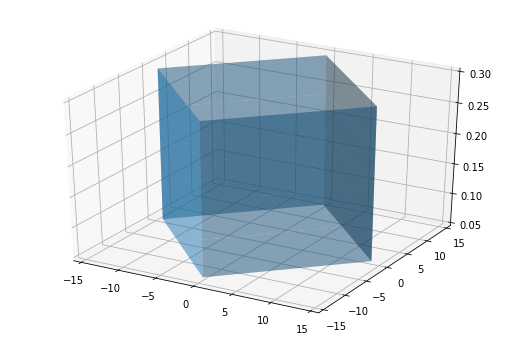

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,0.05,0.1)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
fig.set_size_inches(9, 6)
plt.show()


### Another example

This seems to have the sort of features that might make sense for the beer glass example. The question is how to translate this into a linear profile that is rotated. What is important in the structure here is that creating the 2D grid of radius and theta sets up a cylindrical mesh on the x-y plane. From the radius and theta we can then determine the related x and y mesh points and the 'stand the z values up above those points. I'm going to copy this  below and take it apart slowly....


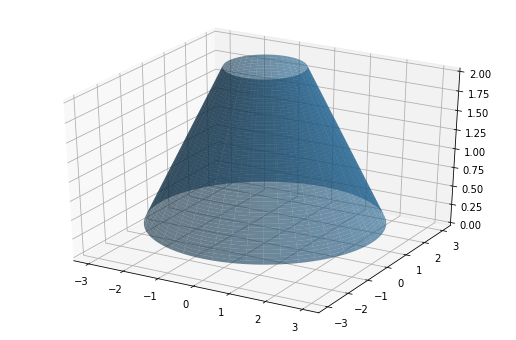

In [5]:

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Set up the grid in polar
theta = np.linspace(0,2*np.pi,90)
r = np.linspace(1,3,50)
T, R = np.meshgrid(theta, r)

# Then calculate X, Y, and Z
X = R * np.cos(T)
Y = R * np.sin(T)
Z = -np.sqrt(X**2 + Y**2) + 3.25

# Set the Z values outside your range to NaNs so they aren't plotted
#Z[Z < 0] = np.nan
#Z[Z > 2.1] = np.nan
ax.plot_surface(X, Y, Z, alpha = 0.6)

ax.set_zlim(0,2)
fig.set_size_inches(9, 6)
plt.show()

### One step at a time....

Let's imagine I have a straight line 

$$y = -20x + 60$$

which defines the side of my volume. If I invert this I get

$$ x = \frac{y - 60}{-20}$$

In this model the x value will become the radius of the rotated volume and y will become the height or z value. This worked!!

Quadratic Model

$$ y = 2 \cdot x^2 - 18$$

between x  = 3 and x = 3.317 This is a z range of 0 to 4 - I tried it for larger values of x but it was hard to see the curvature.

$$ x = \sqrt{.5(y+18)}$$

To give the shape some thickness I then generate a second radial list that is just a little bigger. I will call this the thickness


In [6]:
# define desired range of z - the height of this section of the rotated volume
# create the equivalent radial list defining the radius at each z
# Cone

thickness = 1.5

# z_range = np.linspace(0, 20, 10)
# radial_values = (z_range - 60.)/(-20.)

# quadratic

z_range = np.linspace(0,4,10)
radial_values = np.sqrt(.5*(z_range+18))
radial_outer = radial_values + thickness



### Mesh R and theta together

This step should be completely consistent for all plots...

In [7]:
# Set up the grid in polar
theta = np.linspace(0,2*np.pi,90)
#r = np.linspace(1,3,50)
T, R = np.meshgrid(theta, radial_values)
To, Ro = np.meshgrid(theta, radial_outer)

### Regenerate the z (height) values

I know it seems ridiculous at the moment to invert the function initially and then essentially go back the other way. Perhaps there is a simpler way to do this but because what we want to do is take some linear profile and rotate it around the z axis I think this is the process that cleanly leads to a consistent process for doing so.

In [10]:
# Then calculate X, Y, and Z
X = R * np.cos(T)
Y = R * np.sin(T)
Z = 2.*np.sqrt(X**2 + Y**2)**2

# outer wall

Xo = Ro * np.cos(T)
Yo = Ro * np.sin(T)
Zo = 2.*(np.sqrt(Xo**2 + Yo**2))**2 - 8.

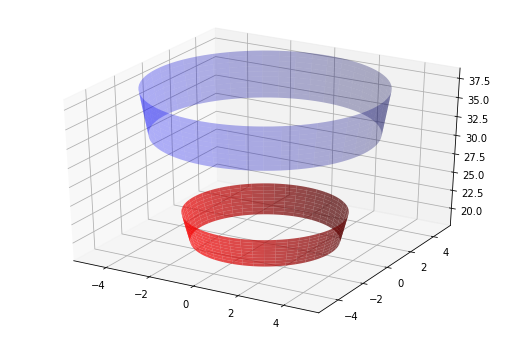

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


ax.plot_surface(X, Y, Z, color = 'red', alpha = 0.7)
ax.plot_surface(Xo, Yo, Zo, color = 'blue', alpha = 0.3)

#ax.set_zlim(0,2)
fig.set_size_inches(9, 6)
plt.show()